<a href="https://colab.research.google.com/github/jesschannn/datasci_3_eda/blob/main/datasci_3_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading in Packages

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading in Data

In [118]:
df = pd.read_csv('healthcare_data_cleaning.csv')
df

,Patient Age,Average Heart Rate,Average BP,Height (in cm),Weight (in kg),Payment Due ($),Last Visit (days ago),Visit Duration (mins),Number of Tests,Prescription Cost ($)
0,45,66,111,183,70,65.45721578,193,92,5,15.71751736
1,25,59,missing,174,58,430.6836568,195,missing,4,80.78647284
2,51,79,119,161,56,315.0709305,missing,37,2,64.3921393
3,18,99,115,171,52,320.2998988,175,108,2,8.872859215
4,48,93,89,186,87,264.2147372,188,113,3,77.48311305
...,...,...,...,...,...,...,...,...,...,...
104995,74,65,112,169,61,309.1644461,183,10,3,63.20478777
104996,37,missing,111,165,67,missing,191,47,2,113.8676403
104997,51,89,118,179,71,320.830418,172,39,3,35.62242023
104998,missing,74,123,167,75,5.34123142,180,79,missing,124.408341


# Looking for Missingness

In [119]:
df.replace('missing', pd.np.nan, inplace=True)
df

<ipython-input-119-31a068059994>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df.replace('missing', pd.np.nan, inplace=True)


,Patient Age,Average Heart Rate,Average BP,Height (in cm),Weight (in kg),Payment Due ($),Last Visit (days ago),Visit Duration (mins),Number of Tests,Prescription Cost ($)
0,45,66,111,183,70,65.45721578,193,92,5,15.71751736
1,25,59,NaN,174,58,430.6836568,195,NaN,4,80.78647284
2,51,79,119,161,56,315.0709305,NaN,37,2,64.3921393
3,18,99,115,171,52,320.2998988,175,108,2,8.872859215
4,48,93,89,186,87,264.2147372,188,113,3,77.48311305
...,...,...,...,...,...,...,...,...,...,...
104995,74,65,112,169,61,309.1644461,183,10,3,63.20478777
104996,37,NaN,111,165,67,NaN,191,47,2,113.8676403
104997,51,89,118,179,71,320.830418,172,39,3,35.62242023
104998,NaN,74,123,167,75,5.34123142,180,79,NaN,124.408341


In [120]:
df=df.dropna()
df

,Patient Age,Average Heart Rate,Average BP,Height (in cm),Weight (in kg),Payment Due ($),Last Visit (days ago),Visit Duration (mins),Number of Tests,Prescription Cost ($)
0,45,66,111,183,70,65.45721578,193,92,5,15.71751736
3,18,99,115,171,52,320.2998988,175,108,2,8.872859215
4,48,93,89,186,87,264.2147372,188,113,3,77.48311305
5,62,89,118,185,88,207.6380381,185,101,2,38.56558698
7,52,99,129,170,47,387.0850435,179,108,2,76.96592633
...,...,...,...,...,...,...,...,...,...,...
104992,44,76,93,178,66,462.5656709,189,55,3,59.74631825
104993,42,80,129,171,78,131.3563258,185,22,6,104.4301674
104994,53,68,109,172,75,488.0316041,167,25,5,69.54228579
104995,74,65,112,169,61,309.1644461,183,10,3,63.20478777


# Renaming Columns

In [121]:
import re

In [122]:
# Function to remove white space and special characters from a value
def clean_column_names(df1):
    # Define a helper function to clean column names
    def clean_name(name):
        cleaned_name = re.sub(r'[^a-zA-Z0-9]', '', name)
        return cleaned_name.lower()

    # Rename columns using the helper function
    # This is using a list comprehend - e.g., we have a list to the right of the equals sign,
    # and inside the list, we are applying our function, for every col (or X) that exists in df.columns
    df1.columns = [clean_name(col) for col in df1.columns]
    return df

# Apply the clean_value function to all columns
df1 = clean_column_names(df)

df1

,patientage,averageheartrate,averagebp,heightincm,weightinkg,paymentdue,lastvisitdaysago,visitdurationmins,numberoftests,prescriptioncost
0,45,66,111,183,70,65.45721578,193,92,5,15.71751736
3,18,99,115,171,52,320.2998988,175,108,2,8.872859215
4,48,93,89,186,87,264.2147372,188,113,3,77.48311305
5,62,89,118,185,88,207.6380381,185,101,2,38.56558698
7,52,99,129,170,47,387.0850435,179,108,2,76.96592633
...,...,...,...,...,...,...,...,...,...,...
104992,44,76,93,178,66,462.5656709,189,55,3,59.74631825
104993,42,80,129,171,78,131.3563258,185,22,6,104.4301674
104994,53,68,109,172,75,488.0316041,167,25,5,69.54228579
104995,74,65,112,169,61,309.1644461,183,10,3,63.20478777


In [123]:
df.isnull().sum()

patientage           0
averageheartrate     0
averagebp            0
heightincm           0
weightinkg           0
paymentdue           0
lastvisitdaysago     0
visitdurationmins    0
numberoftests        0
prescriptioncost     0
dtype: int64

In [124]:
df.rename(columns = {'patientage':'age', 'heightinkg': 'height_cm', 'weightinkg':'weight_kg'}, inplace = True)
df

<ipython-input-124-5404b0d728ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'patientage':'age', 'heightinkg': 'height_cm', 'weightinkg':'weight_kg'}, inplace = True)


,age,averageheartrate,averagebp,heightincm,weight_kg,paymentdue,lastvisitdaysago,visitdurationmins,numberoftests,prescriptioncost
0,45,66,111,183,70,65.45721578,193,92,5,15.71751736
3,18,99,115,171,52,320.2998988,175,108,2,8.872859215
4,48,93,89,186,87,264.2147372,188,113,3,77.48311305
5,62,89,118,185,88,207.6380381,185,101,2,38.56558698
7,52,99,129,170,47,387.0850435,179,108,2,76.96592633
...,...,...,...,...,...,...,...,...,...,...
104992,44,76,93,178,66,462.5656709,189,55,3,59.74631825
104993,42,80,129,171,78,131.3563258,185,22,6,104.4301674
104994,53,68,109,172,75,488.0316041,167,25,5,69.54228579
104995,74,65,112,169,61,309.1644461,183,10,3,63.20478777


# Cleaning Data

In [125]:
df.drop_duplicates(inplace=True)
df

<ipython-input-125-769a7c6c9b00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


,age,averageheartrate,averagebp,heightincm,weight_kg,paymentdue,lastvisitdaysago,visitdurationmins,numberoftests,prescriptioncost
0,45,66,111,183,70,65.45721578,193,92,5,15.71751736
3,18,99,115,171,52,320.2998988,175,108,2,8.872859215
4,48,93,89,186,87,264.2147372,188,113,3,77.48311305
5,62,89,118,185,88,207.6380381,185,101,2,38.56558698
7,52,99,129,170,47,387.0850435,179,108,2,76.96592633
...,...,...,...,...,...,...,...,...,...,...
104992,44,76,93,178,66,462.5656709,189,55,3,59.74631825
104993,42,80,129,171,78,131.3563258,185,22,6,104.4301674
104994,53,68,109,172,75,488.0316041,167,25,5,69.54228579
104995,74,65,112,169,61,309.1644461,183,10,3,63.20478777


In [ ]:
df['paymentdue'] = pd.to_numeric(df['paymentdue'], errors='coerce')
df['prescriptioncost'] = pd.to_numeric(df['prescriptioncost'], errors='coerce')
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['averageheartrate'] = pd.to_numeric(df['averageheartrate'], errors='coerce')
df['averagebp'] = pd.to_numeric(df['averagebp'], errors='coerce')
df['weight_kg'] = pd.to_numeric(df['weight_kg'], errors='coerce')
df['heightincm'] = pd.to_numeric(df['heightincm'], errors ='coerce')
df['lastvisitdaysago'] = pd.to_numeric(df['lastvisitdaysago'], errors='coerce')
df['visitdurationmins'] = pd.to_numeric(df['visitdurationmins'], errors='coerce')
df['numberoftests'] = pd.to_numeric(df['numberoftests'], errors = 'coerce')

# Univariate Analysis

## Central Tendency for Average Heart Rate

In [127]:
mean1 = df['averageheartrate'].mean()
mean1

79.53149744705784

In [128]:
median1 = df['averageheartrate'].median()
median1

80.0

In [129]:
mode1 = df['averageheartrate'].mode().values[0]
mode1

80

## Measure of Spread for Average Heart Rate

In [130]:
range1 = df['averageheartrate'].max() - df['averageheartrate'].min()
range1

70

In [131]:
variance1 = df['averageheartrate'].var()
variance1

100.35287252742759

In [132]:
std_dev1= df['averageheartrate'].std()
std_dev1

10.017628088895474

In [133]:
iqr = df['averageheartrate'].quantile(0.75) - df['averageheartrate'].quantile(0.25)
iqr

13.0

In [134]:
print("Measures of Central Tendency:")
print(f"Mean: {mean1}")
print(f"Median: {median1}")
print(f"Mode: {mode1}")
print("\nMeasures of Spread:")
print(f"Range: {range1}")
print(f"Variance: {variance1}")
print(f"Standard Deviation: {std_dev1}")
print(f"IQR (Interquartile Range): {iqr}")

Measures of Central Tendency:
Mean: 79.53149744705784
Median: 80.0
Mode: 80

Measures of Spread:
Range: 70
Variance: 100.35287252742759
Standard Deviation: 10.017628088895474
IQR (Interquartile Range): 13.0


## Central Tendency for Average Blood Pressure

In [135]:
mean2 = df['averagebp'].mean()
mean2

109.50981836444295

In [136]:
median2 = df['averagebp'].median()
median2

110.0

In [137]:
mode2 = df['averagebp'].mode().values[0]
mode2

80

## Measure of Spread for Average Blood Pressure

In [138]:
range2 = df['averagebp'].max() - df['averagebp'].min()
range2

60

In [139]:
variance2 = df['averagebp'].var()
variance2

207.29932687463176

In [140]:
std_dev2 = df['averagebp'].std()
std_dev2

14.397893140131016

In [141]:
iqr2 = df['averagebp'].quantile(0.75) - df['averagebp'].quantile(0.25)
iqr2

21.0

In [142]:
print("Measures of Central Tendency:")
print(f"Mean: {mean2}")
print(f"Median: {median2}")
print(f"Mode: {mode2}")
print("\nMeasures of Spread:")
print(f"Range: {range2}")
print(f"Variance: {variance2}")
print(f"Standard Deviation: {std_dev2}")
print(f"IQR (Interquartile Range): {iqr2}")

Measures of Central Tendency:
Mean: 109.50981836444295
Median: 110.0
Mode: 80

Measures of Spread:
Range: 60
Variance: 207.29932687463176
Standard Deviation: 14.397893140131016
IQR (Interquartile Range): 21.0


# Histograms

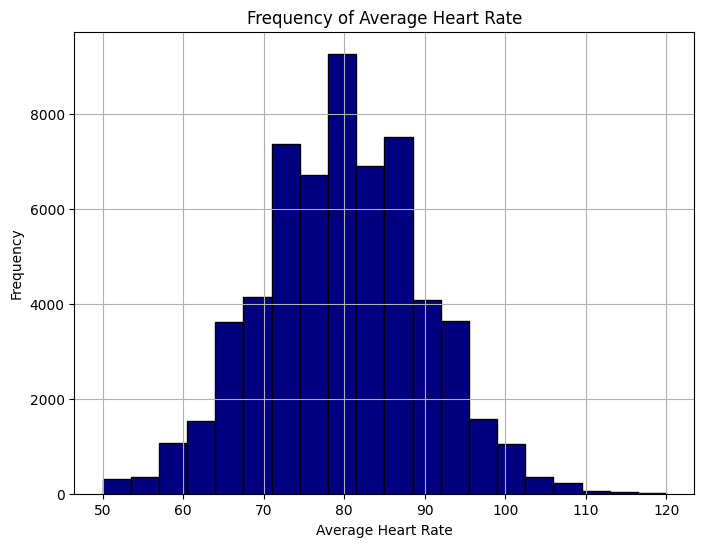

In [143]:
plt.figure(figsize=(8, 6))
plt.hist(df['averageheartrate'], bins=20, color='navy', edgecolor='black')
plt.title('Frequency of Average Heart Rate')
plt.xlabel('Average Heart Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

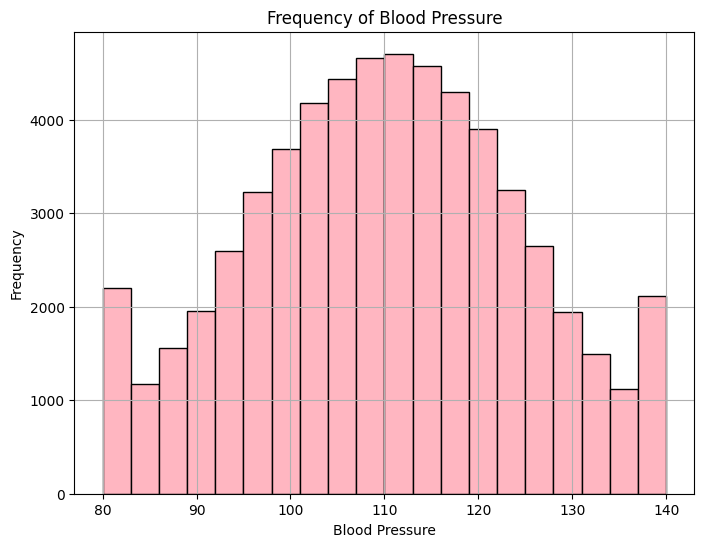

In [144]:
plt.figure(figsize=(8, 6))
plt.hist(df['averagebp'], bins=20, color='lightpink', edgecolor='black')
plt.title('Frequency of Blood Pressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Bivariate Analysis

## Scatterplots

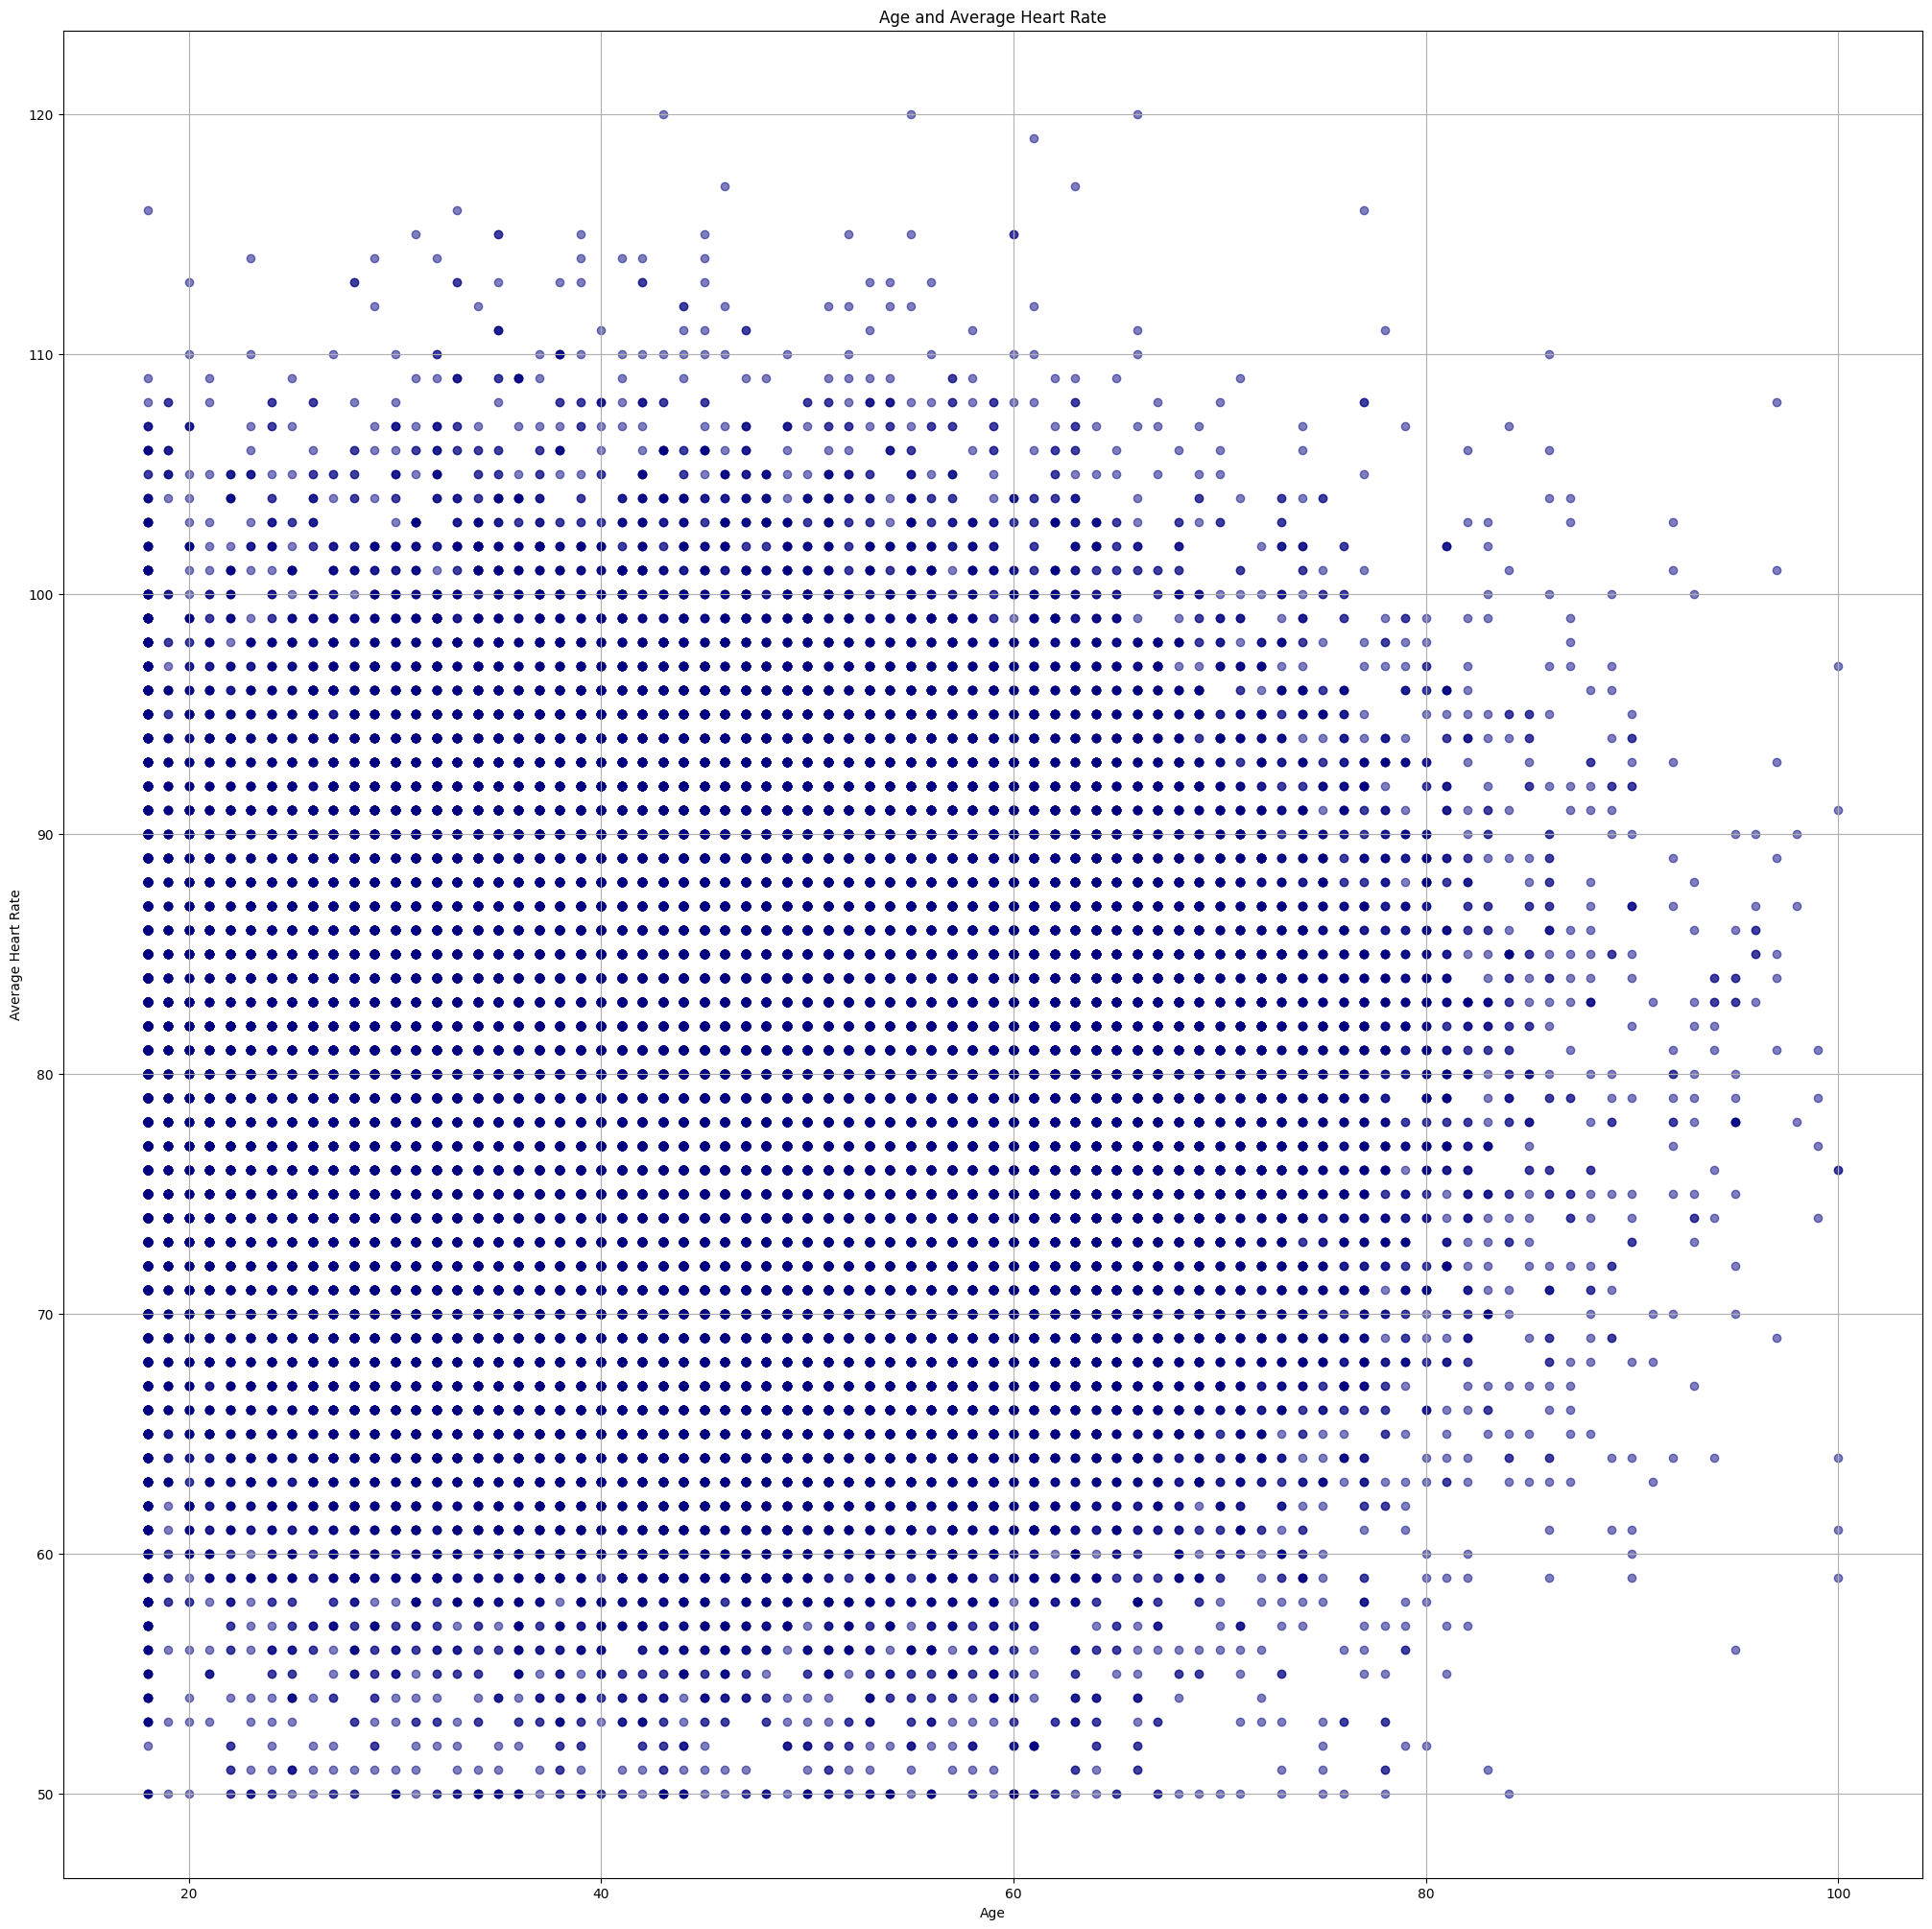

In [145]:
plt.figure(figsize=(25, 25))
plt.scatter(df['age'], df['averageheartrate'], alpha=0.5, color='navy')
plt.title('Age and Average Heart Rate')
plt.xlabel('Age')
plt.ylabel('Average Heart Rate')
plt.grid(True)
plt.show()

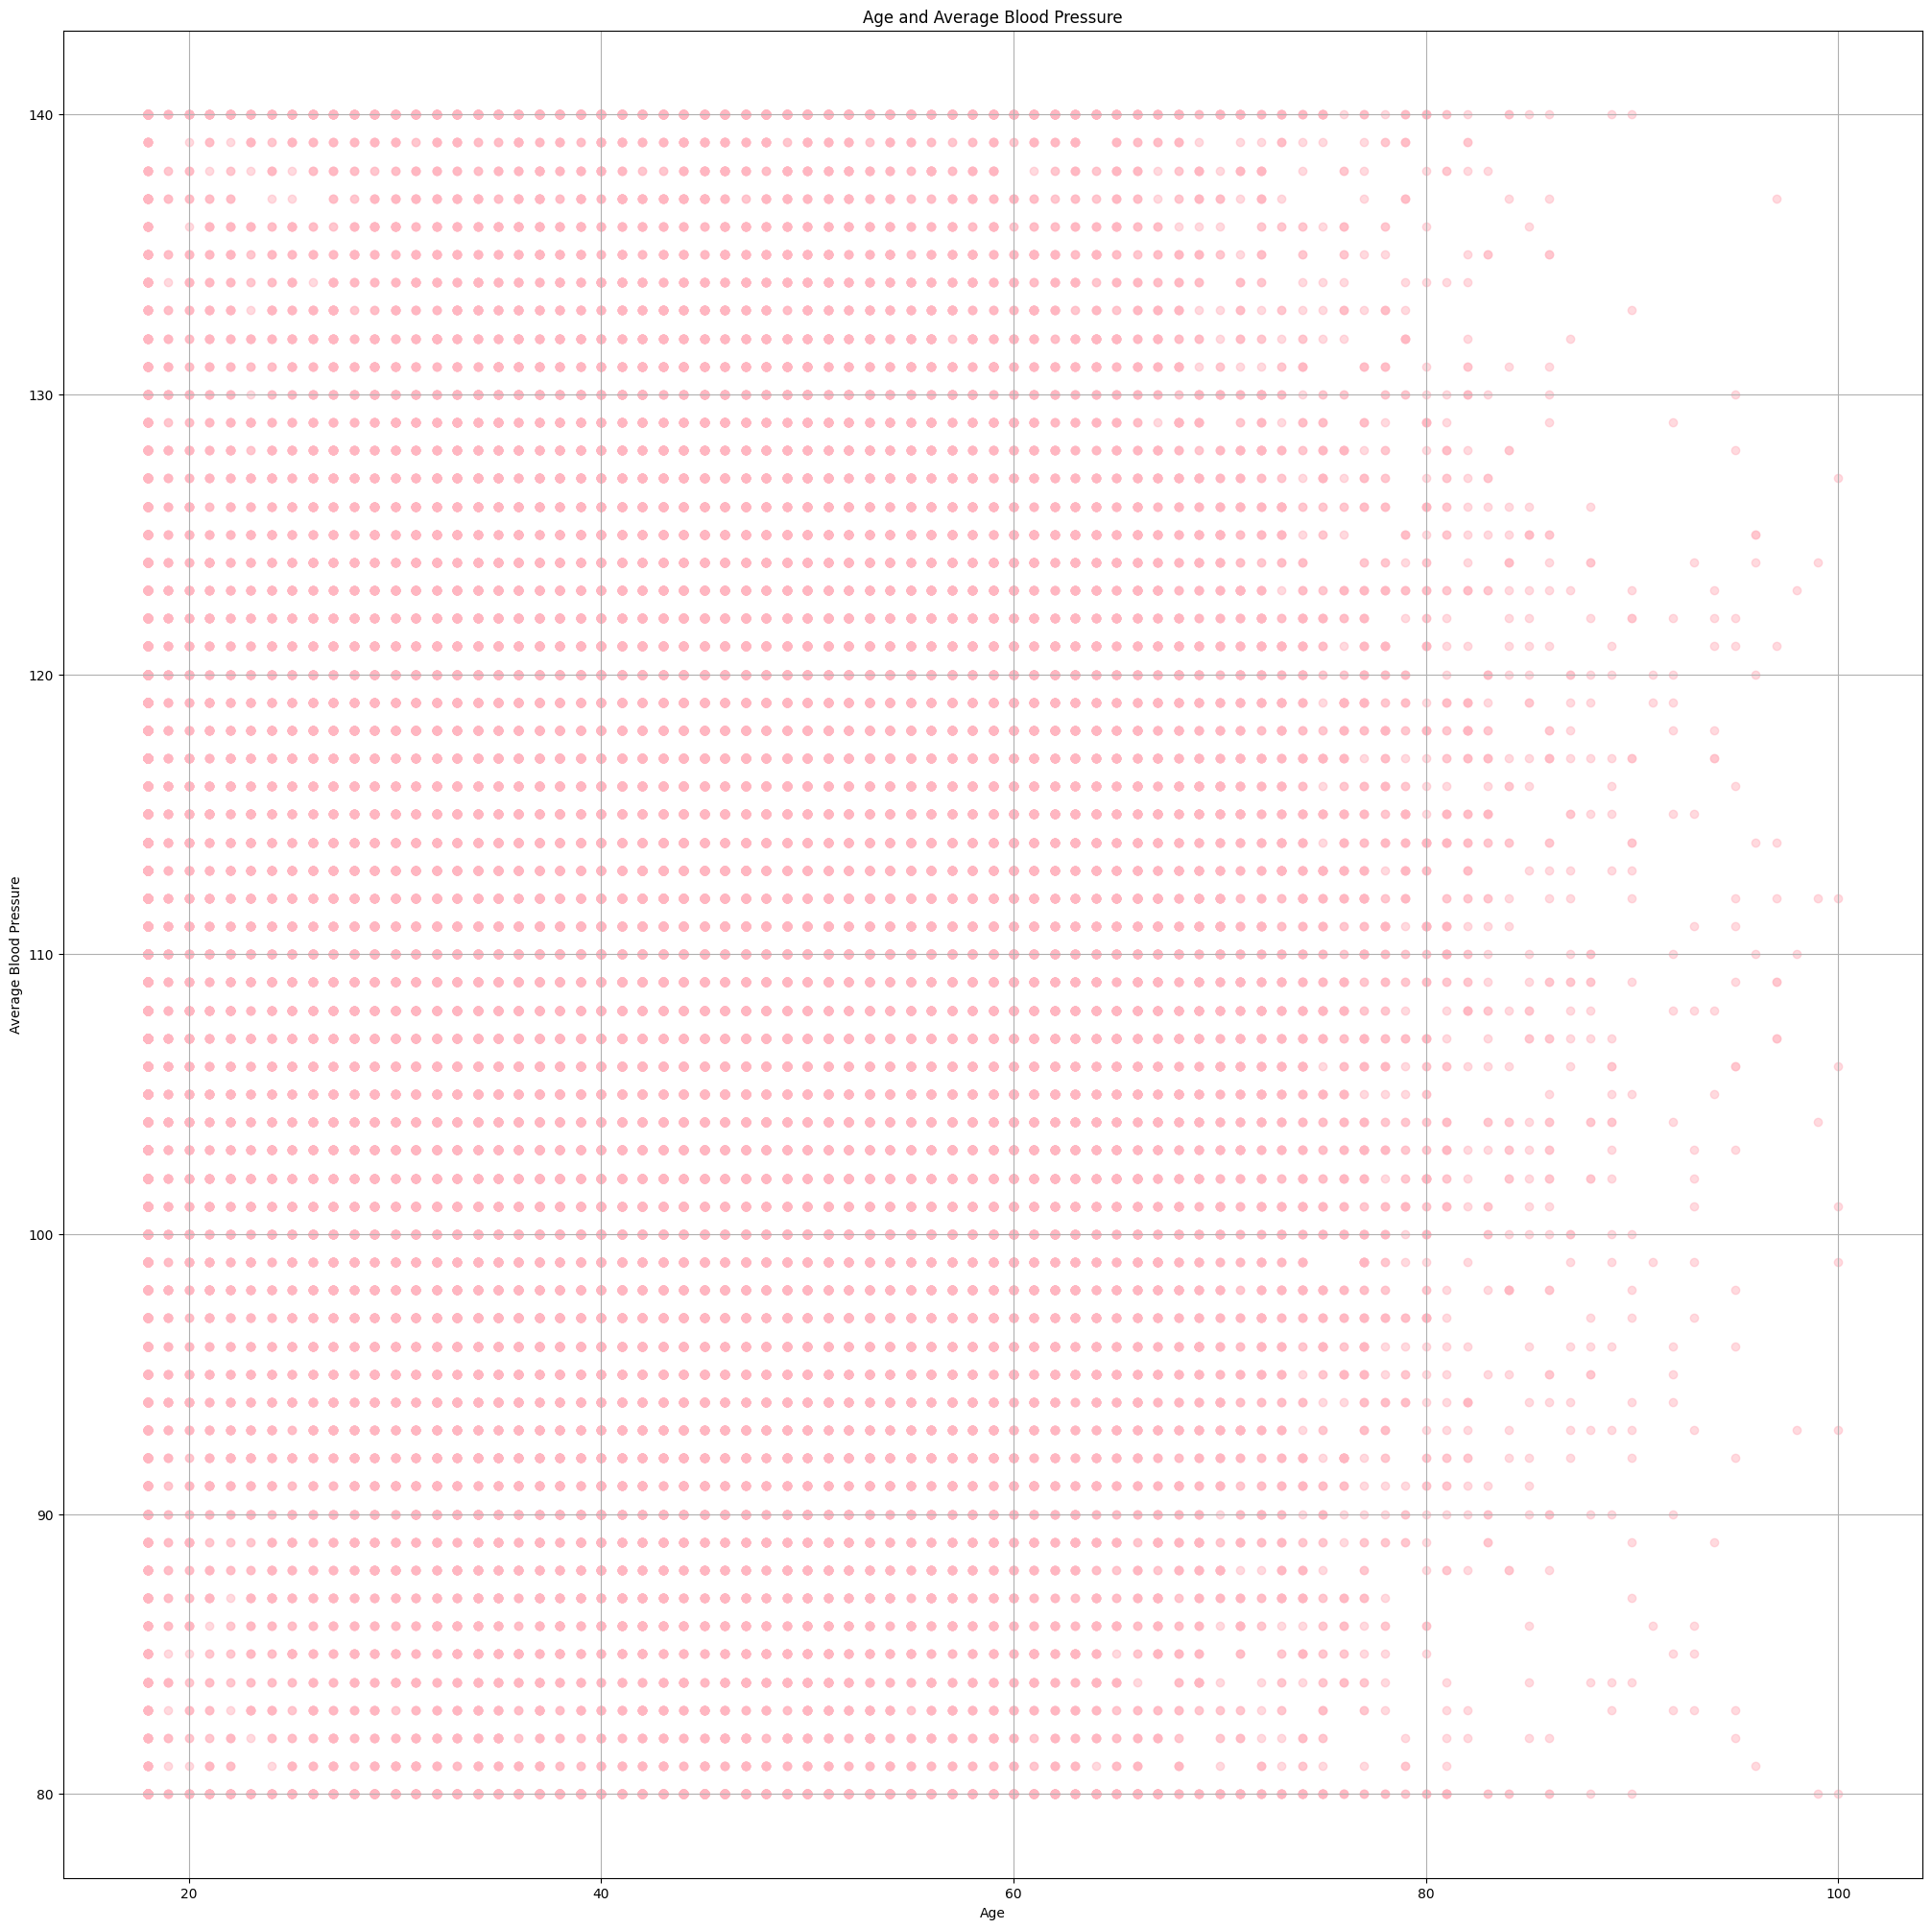

In [146]:
plt.figure(figsize=(25, 25))
plt.scatter(df['age'], df['averagebp'], alpha=0.5, color='lightpink')
plt.title('Age and Average Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Average Blood Pressure')
plt.grid(True)
plt.show()

## Correlation Coefficients

In [149]:
correlation_matrix = df.corr()
print(correlation_matrix)

                        age  averageheartrate  averagebp  heightincm  \
age                1.000000          0.001755  -0.005447   -0.004913   
averageheartrate   0.001755          1.000000  -0.003472    0.000116   
averagebp         -0.005447         -0.003472   1.000000   -0.003876   
heightincm        -0.004913          0.000116  -0.003876    1.000000   
weight_kg          0.004506          0.000432  -0.006721   -0.000482   
paymentdue        -0.000567          0.000838   0.004141   -0.006148   
lastvisitdaysago  -0.010512          0.004037  -0.003578    0.002253   
visitdurationmins -0.007753          0.003110   0.003108    0.004119   
numberoftests      0.003578          0.002047  -0.006907    0.001173   
prescriptioncost  -0.000133         -0.004932  -0.003038    0.002814   

                   weight_kg  paymentdue  lastvisitdaysago  visitdurationmins  \
age                 0.004506   -0.000567         -0.010512          -0.007753   
averageheartrate    0.000432    0.000838     

## Correlation Heat Map

In [151]:
import seaborn as sns

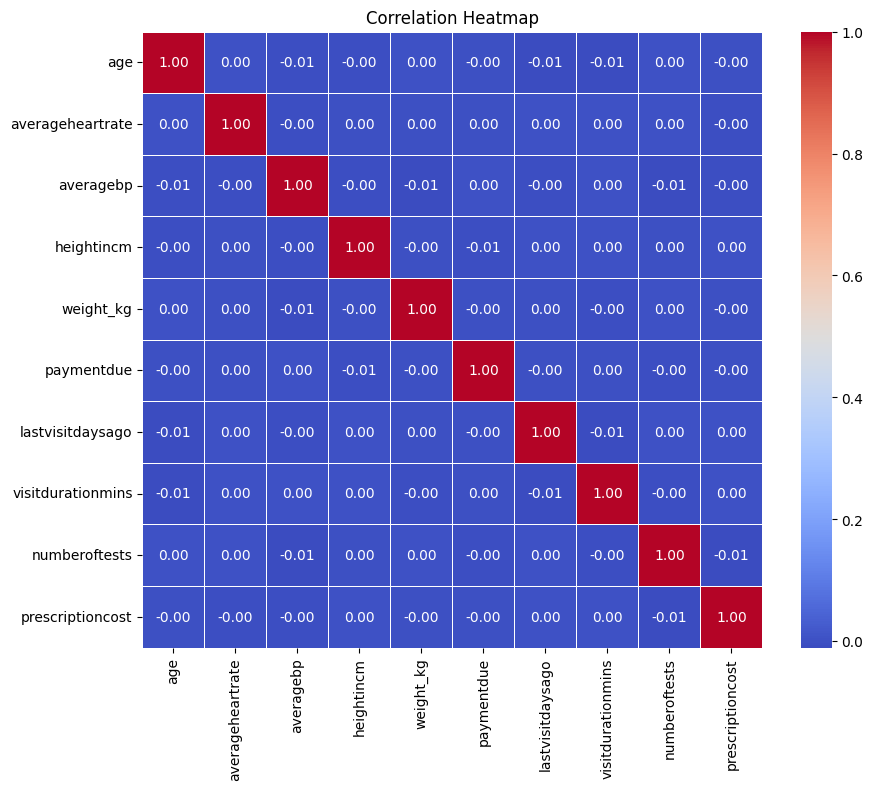

In [152]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Strong Correlations

Based on the correlation heat map, there were no strong correlations found when comparing one variable to a different variable. In fact there was no correlation whatsoever between any of the variables. The only strong correlations seen on the map were when a variable was being compared with itself.

# Handling Outliers

In [154]:
variable_of_interest = 'averageheartrate'
Q1 = df[variable_of_interest].quantile(0.25)
Q3 = df[variable_of_interest].quantile(0.75)
IQR = Q3 - Q1

In [155]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [173]:
outliers = df[(df[variable_of_interest] < lower_bound) | (df[variable_of_interest] > upper_bound)]
print(outliers)

        age  averageheartrate  averagebp  heightincm  weight_kg  paymentdue  \
173      56                53        100         166         74  343.132583   
353      37                51        112         181         52    1.996442   
430      58               106        102         174         59  296.892735   
460      31                53        101         176         52  153.594672   
466      18               106        101         175         89  157.663458   
...     ...               ...        ...         ...        ...         ...   
104028   43                51        140         177         49  364.566950   
104349   58                53         97         171         78  439.540041   
104835   18               108        107         175         88  139.318780   
104850   45                50        106         163         63  266.106695   
104945   49               110         89         166         74  121.143824   

        lastvisitdaysago  visitdurationmins  number

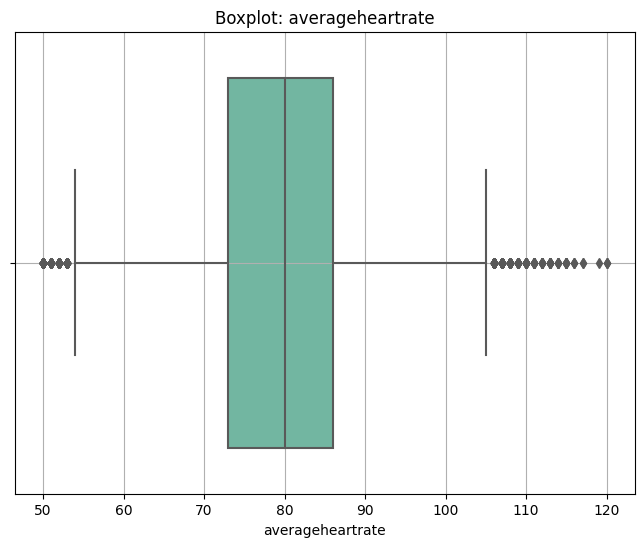

In [167]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=variable_of_interest, data=df, palette='Set2')
plt.title(f'Boxplot: {variable_of_interest}')
plt.xlabel(variable_of_interest)
plt.grid(True)
plt.show()

### Explanation on Handling Outliers

I would choose to include the outliers in the data. Based on the box plot for average heart rate, the mean is at 80 with outliers in the 50s and ranging from 105 to 120. Although these numbers are far from the mean, these outliers specifically contain valuable information. Putting this data into context, these outliers could mean that the patient is either tachycardiac or bradycardiac, which would be important to chart for a provider.

# Automated Analysis

In [ ]:
!pip install pandas-profiling

In [172]:
import pandas as pd
from pandas_profiling import ProfileReport

# Load your dataset
data = pd.read_csv('healthcare_data_cleaning.csv')

# Generate the EDA report
report = ProfileReport(data)
report.to_file('eda_report.html')

<ipython-input-172-b5b99ad44420>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]